In [2008]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

store 370 import and clean

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


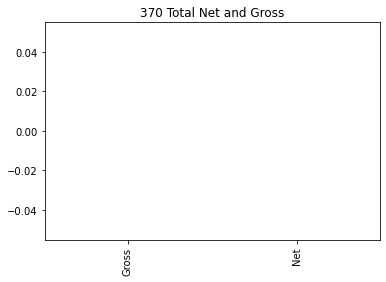

Total Gross: 0.0
Total Net: 0.0


In [2009]:
df0 = pd.read_excel (r'370.xlsx',header=[3])
df0.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df0.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
df0 = df0[df0.Customer != "TRANSFERS TO #372 J'VILLE"]
df0 = df0[df0.Customer != "TRANSFERS TO #374 SEYMOUR"]
df0 = df0[df0.Customer != "TRANSFERS TO #373 E-TOWN"]
df0 = df0[df0.Customer != "TRANSFERS TO #375 S'VILLE"]
df0 = df0[df0.Customer != "*** STORE TRANSFERS ***"]
df0 = df0[df0.Customer != "Beginning Balance"]
df0 = df0[df0.Customer != 'Net Activity']
df0 = df0[df0.Customer != 'Ending Balance']
df0 = df0[df0.Customer != 'VOID']
df0 = df0[df0.Customer != "TRANSFERS TO #376 L'VILLE"]
df0 = df0.dropna(how="all")
Gross = df0.Qty * df0.Price
df0['Gross'] = Gross.where(df0.Price == 'Qty', other=Gross)

Net = df0.Qty * df0.Cost 
df0['Net'] = Net.where(df0.Cost == 'Qty', other=Net)

Net = df0.Gross - df0.Net 
df0['Net'] = Net.where(df0.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross270 = {
    'Gross' : df0['Gross'].sum(),
    'Net' : df0['Net'].sum()
}

data = Net_Gross270
names = list(data.keys())
values = list(data.values())

plt.title("370 Total Net and Gross")
plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df0['Gross'].sum()
Total_net = df0['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

In [2010]:
df0['Date'] = pd.to_datetime(df0['Date'])
df0['Date'] = df0['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df0 = df0.groupby(df0['Date']).aggregate(agg_functions)

print(df0)

# df_new.to_csv(r'df5.csv', index=False)

Empty DataFrame
Columns: [Date, Gross, Net]
Index: []


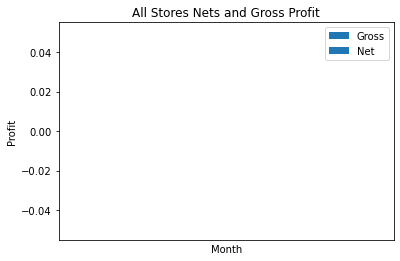

In [2031]:
# x-coordinates of left sides of bars 
left = df0['Date']
  
# heights of bars
Gross = df0['Gross']
Net = df0['Net']
  
# labels for bars
tick_label = df0['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['red'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('All Stores Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.show()

Store 372 Import and Clean 

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


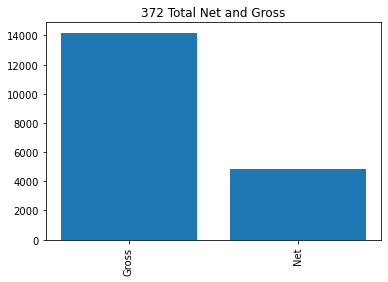

Total Gross: 14195.0
Total Net: 4845.0


In [2011]:
df1 = pd.read_excel (r'372.xlsx',header=[3])
df1.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df1.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
df1 = df1[df1.Customer != "TRANSFERS TO #372 J'VILLE"]
df1 = df1[df1.Customer != "TRANSFERS TO #374 SEYMOUR"]
df1 = df1[df1.Customer != "TRANSFERS TO #373 E-TOWN"]
df1 = df1[df1.Customer != "TRANSFERS TO #375 S'VILLE"]
df1 = df1[df1.Customer != "*** STORE TRANSFERS ***"]
df1 = df1[df1.Customer != "Beginning Balance"]
df1 = df1[df1.Customer != 'Net Activity']
df1 = df1[df1.Customer != 'Ending Balance']
df1 = df1[df1.Customer != 'VOID']
df1 = df1[df1.Customer != "TRANSFERS TO #376 L'VILLE"]
df1 = df1.dropna(how="all")

Gross = df1.Qty * df1.Price
df1['Gross'] = Gross.where(df1.Price == 'Qty', other=Gross)

Net = df1.Qty * df1.Cost 
df1['Net'] = Net.where(df1.Cost == 'Qty', other=Net)

Net = df1.Gross - df1.Net 
df1['Net'] = Net.where(df1.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross272 = {
    'Gross' : df1['Gross'].sum(),
    'Net' : df1['Net'].sum()
}

plt.title("372 Total Net and Gross")
data = Net_Gross272
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df1['Gross'].sum()
Total_net = df1['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

In [2012]:
by_cust =(df1['Customer']).value_counts().sort_index()
df1_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df1_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df1_customer

,Customer,counts
5,"GOTTA GO, INC.",14
0,A & R LOGISTICS INC,13
3,DUBOIS COUNTY TIRE & SUPP,6
6,"GOTTA GO, INC. - TRACKING",5
8,MISTER P EXPRESS INC.,3
4,ERNST CONCRETE KENTUCKIAN,2
7,MILLER TRANSPORTATION/ IN,2
9,RAY-LEE TRANSPORT,2
1,A&S TRUCK RD SERVICE LLC,1
2,C-JAMS,1


In [2029]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df1 = df1.groupby(df1['Date']).aggregate(agg_functions)

print(df1)

# df_new.to_csv(r'df5.csv', index=False)

Empty DataFrame
Columns: [Date, Gross, Net]
Index: []


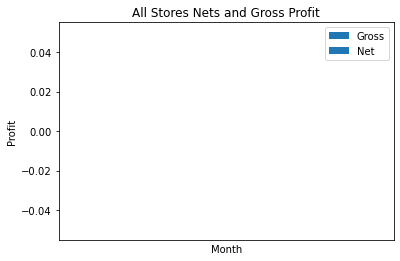

In [2030]:
# x-coordinates of left sides of bars 
left = df1['Date']
  
# heights of bars
Gross = df1['Gross']
Net = df1['Net']
  
# labels for bars
tick_label = df1['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['red'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('All Stores Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.show()

Store 373 Import and Clean 

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


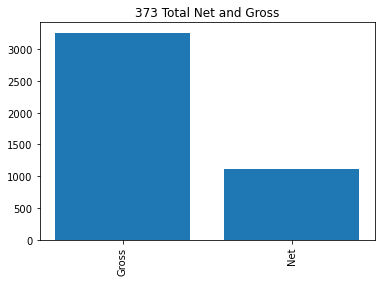

Total Gross: 3260.0
Total Net: 1110.0


In [2014]:
df2 = pd.read_excel (r'373.xlsx',header=[3])
df2.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df2.rename(columns={'Customer/Vendor Name' : 'Customer', "Transaction Date" : 'Date', 'Non-Inventory Quantity' : 'Qty','Transaction Date' : 'Date'}, inplace=True)
df2 = df2[df2.Customer != "TRANSFERS TO #372 J'VILLE"]
df2 = df2[df2.Customer != "TRANSFERS TO #374 SEYMOUR"]
df2 = df2[df2.Customer != "TRANSFERS TO #373 E-TOWN"]
df2 = df2[df2.Customer != "TRANSFERS TO #375 S'VILLE"]
df2 = df2[df2.Customer != "*** STORE TRANSFERS ***"]
df2 = df2[df2.Customer != "Beginning Balance"]
df2 = df2[df2.Customer != 'Net Activity']
df2 = df2[df2.Customer != 'Ending Balance']
df2 = df2[df2.Customer != 'VOID']
df2 = df2[df2.Customer != "TRANSFERS TO #376 L'VILLE"]
df2 = df2.dropna(how="all")

Gross = df2.Qty * df2.Price
df2['Gross'] = Gross.where(df2.Price == 'Qty', other=Gross)

Net = df2.Qty * df2.Cost 
df2['Net'] = Net.where(df2.Cost == 'Qty', other=Net)

Net = df2.Gross - df2.Net 
df2['Net'] = Net.where(df2.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross273 = {
    'Gross' : df2['Gross'].sum(),
    'Net' : df2['Net'].sum()
}

plt.title("373 Total Net and Gross")
data = Net_Gross273
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df2['Gross'].sum()
Total_net = df2['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))


In [2015]:
by_cust =(df2['Customer']).value_counts().sort_index()
df2_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df2_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df2_customer

,Customer,counts
0,BROTHERS FARMS,4
1,"REPUBLIC SERVICES, INC. 3058",2
2,SMITH GRAIN,1


In [2016]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'] = df2['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df2 = df2.groupby(df2['Date']).aggregate(agg_functions)

print(df2)

# df_new.to_csv(r'df5.csv', index=False)

            Date   Gross    Net
Date                           
2021-09  2021-09   300.0  100.0
2021-12  2021-12   320.0  120.0
2022-01  2022-01  1125.0  375.0
2022-02  2022-02   450.0  150.0
2022-04  2022-04   825.0  275.0
2022-07  2022-07   240.0   90.0


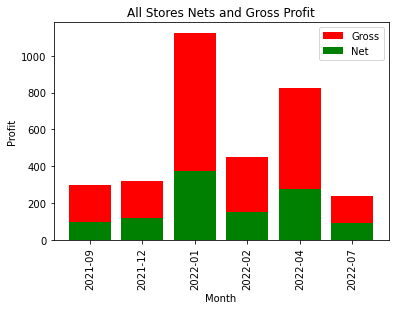

In [2028]:
# x-coordinates of left sides of bars 
left = df2['Date']
  
# heights of bars
Gross = df2['Gross']
Net = df2['Net']
  
# labels for bars
tick_label = df2['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['red'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('All Stores Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.show()

Store 374 Import and Clean 

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


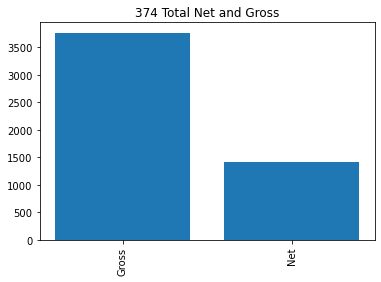

Total Gross: 3765.0
Total Net: 1415.0


In [2017]:
df3 = pd.read_excel (r'374.xlsx',header=[3])
df3.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df3.rename(columns={'Customer/Vendor Name' : 'Customer','Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
df3 = df3[df3.Customer != "TRANSFERS TO #372 J'VILLE"]
df3 = df3[df3.Customer != "TRANSFERS TO #374 SEYMOUR"]
df3 = df3[df3.Customer != "TRANSFERS TO #373 E-TOWN"]
df3 = df3[df3.Customer != "TRANSFERS TO #375 S'VILLE"]
df3 = df3[df3.Customer != "*** STORE TRANSFERS ***"]
df3 = df3[df3.Customer != "Beginning Balance"]
df3 = df3[df3.Customer != 'Net Activity']
df3 = df3[df3.Customer != 'Ending Balance']
df3 = df3[df3.Customer != 'VOID']
df3 = df3[df3.Customer != "TRANSFERS TO #376 L'VILLE"]
df3 = df3.dropna(how="all")

Gross = df3.Qty * df3.Price
df3['Gross'] = Gross.where(df3.Price == 'Qty', other=Gross)

Net = df3.Qty * df3.Cost 
df3['Net'] = Net.where(df3.Cost == 'Qty', other=Net)

Net = df3.Gross - df3.Net 
df3['Net'] = Net.where(df3.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross274 = {
    'Gross' : df3['Gross'].sum(),
    'Net' : df3['Net'].sum()
}

plt.title("374 Total Net and Gross")
data = Net_Gross274
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df3['Gross'].sum()
Total_net = df3['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))


In [2018]:
by_cust =(df3['Customer']).value_counts().sort_index()
df3_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df3_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df3_customer

,Customer,counts
7,UHL IDEALEASE - AUSTIN,3
1,MIDNIGHT FLYER & CO. INC.,2
5,"R W TRANSPORT, INC",2
0,FOX FARMS,1
2,NEW WAY TRANSPORTATION,1
3,NORTH VERNON BEVERAGE,1
4,PADGETT TRUCKING INC/OMARA,1
6,SCHROER TRUCKING,1


In [2019]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Date'] = df3['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df3 = df3.groupby(df3['Date']).aggregate(agg_functions)

print(df3)

# df_new.to_csv(r'df5.csv', index=False)

            Date   Gross    Net
Date                           
2021-08  2021-08   300.0  100.0
2021-09  2021-09    75.0   25.0
2022-02  2022-02   600.0  200.0
2022-03  2022-03  1050.0  550.0
2022-04  2022-04  1140.0  340.0
2022-05  2022-05   375.0  125.0
2022-09  2022-09   225.0   75.0


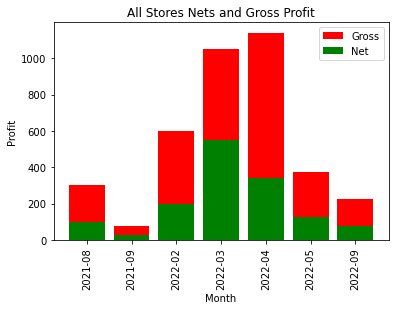

In [2024]:
# x-coordinates of left sides of bars 
left = df3['Date']
  
# heights of bars
Gross = df3['Gross']
Net = df3['Net']
  
# labels for bars
tick_label = df3['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['red'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('All Stores Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.show()

Store 375 Import and Clean 

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


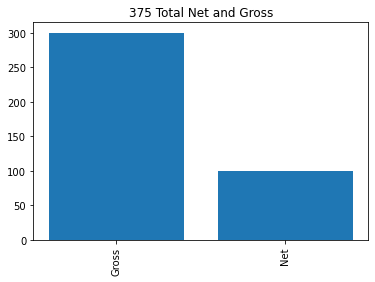

Total Gross: 300.0
Total Net: 100.0


In [2020]:
df4 = pd.read_excel (r'375.xlsx',header=[3])
df4.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)
df4.rename(columns={'Customer/Vendor Name' : 'Customer', 'Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)
df4 = df4[df4.Customer != "TRANSFERS TO #372 J'VILLE"]
df4 = df4[df4.Customer != "TRANSFERS TO #374 SEYMOUR"]
df4 = df4[df4.Customer != "TRANSFERS TO #373 E-TOWN"]
df4 = df4[df4.Customer != "TRANSFERS TO #375 S'VILLE"]
df4 = df4[df4.Customer != "*** STORE TRANSFERS ***"]
df4 = df4[df4.Customer != "Beginning Balance"]
df4 = df4[df4.Customer != 'Net Activity']
df4 = df4[df4.Customer != 'Ending Balance']
df4 = df4[df4.Customer != 'VOID']
df4 = df4[df4.Customer != "TRANSFERS TO #376 L'VILLE"]
df4 = df4.dropna(how="all")

Gross = df4.Qty * df4.Price
df4['Gross'] = Gross.where(df4.Price == 'Qty', other=Gross)

Net = df4.Qty * df4.Cost 
df4['Net'] = Net.where(df4.Cost == 'Qty', other=Net)

Net = df4.Gross - df4.Net 
df4['Net'] = Net.where(df4.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross275 = {
    'Gross' : df4['Gross'].sum(),
    'Net' : df4['Net'].sum()
}

plt.title("375 Total Net and Gross")
data = Net_Gross275
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df4['Gross'].sum()
Total_net = df4['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))


In [2021]:
by_cust =(df4['Customer']).value_counts().sort_index()
df4_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df4_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df4_customer

,Customer,counts
0,HARROD TRANSPORT,1


In [2022]:
df4['Date'] = pd.to_datetime(df4['Date'])
df4['Date'] = df4['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df4 = df4.groupby(df4['Date']).aggregate(agg_functions)

print(df4)

# df_new.to_csv(r'df5.csv', index=False)

            Date  Gross    Net
Date                          
2022-11  2022-11  300.0  100.0


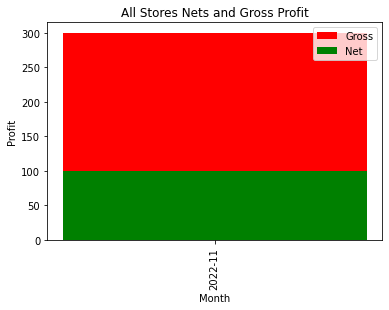

In [2027]:
# x-coordinates of left sides of bars 
left = df4['Date']
  
# heights of bars
Gross = df4['Gross']
Net = df4['Net']
  
# labels for bars
tick_label = df4['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['red'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('All Stores Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


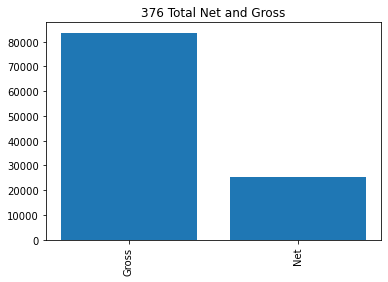

Total Gross: 83650.36
Total Net: 25450.36


In [ ]:
df5 = pd.read_excel (r'376.xlsx',header=[3])

df5.drop(columns=['Transaction Type', 'Reference Number', 'Customer Vendor #','Inventory Balance', 'Transaction Date.1','Reference Number.1', 'Created By', 'Created Date', 'Inventory Quantity','Transaction Type.1', 'Created Time', 'Last Changed By', 'Last Changed Date','Receiving PO Number', 'Last Changed Time' ], inplace=True)

df5.rename(columns={'Customer/Vendor Name' : 'Customer', 'Non-Inventory Quantity': 'Qty', 'Transaction Date' : 'Date'}, inplace=True)

df5 = df5[df5.Customer != "TRANSFERS TO #372 J'VILLE"]
df5 = df5[df5.Customer != "TRANSFERS TO #374 SEYMOUR"]
df5 = df5[df5.Customer != "TRANSFERS TO #373 E-TOWN"]
df5 = df5[df5.Customer != "TRANSFERS TO #375 S'VILLE"]
df5 = df5[df5.Customer != "*** STORE TRANSFERS ***"]
df5 = df5[df5.Customer != "Beginning Balance"]
df5 = df5[df5.Customer != 'Net Activity']
df5 = df5[df5.Customer != 'Ending Balance']
df5 = df5[df5.Customer != 'VOID']
df5 = df5[df5.Customer != "TRANSFERS TO #376 L'VILLE"]
df5 = df5.dropna(how="all")

Gross = df5.Qty * df5.Price
df5['Gross'] = Gross.where(df5.Price == 'Qty', other=Gross)

Net = df5.Qty * df5.Cost 
df5['Net'] = Net.where(df5.Cost == 'Qty', other=Net)

Net = df5.Gross - df5.Net 
df5['Net'] = Net.where(df5.Gross == "Net", other=Net)

# Graph for total time span imported

Net_Gross276 = {
    'Gross' : df5['Gross'].sum(),
    'Net' : df5['Net'].sum()
}

plt.title("376 Total Net and Gross")
data = Net_Gross276
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df5['Gross'].sum()
Total_net = df5['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))


In [ ]:
by_cust =(df5['Customer']).value_counts().sort_index()
df5_customer = by_cust.rename_axis('Customer').reset_index(name='counts')
df5_customer.sort_values(by=['counts'], ascending=False, inplace=True)
df5_customer

,Customer,counts
13,PENSKE #0470 - E. LVILLE,88
12,PENSKE #0456 - LOUISVILLE,78
11,"M & M CARTAGE CO., INC.",37
14,PENSKE #5471 - JEFFVILLE,29
20,"WASTE MANAGEMENT,INC",17
16,"REPUBLIC SERVICES, INC. 3077",7
1,BEST-ONE BOWLING GREEN,7
4,ERNST CONCRETE KENTUCKIAN,6
9,HILL TRANSPORTATION INC.,3
0,A&S TRUCK RD SERVICE LLC,3


In [ ]:
df5['Date'] = pd.to_datetime(df5['Date'])
df5['Date'] = df5['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df5 = df5.groupby(df5['Date']).aggregate(agg_functions)

print(df5)

# df_new.to_csv(r'df5.csv', index=False)

            Date    Gross      Net
Date                              
2021-08  2021-08  4351.50  1351.50
2021-09  2021-09  6835.00  2035.00
2021-10  2021-10  4828.00  1628.00
2021-11  2021-11  5258.50  1608.50
2021-12  2021-12  4618.00  1418.00
2022-01  2022-01  6515.50  2015.50
2022-02  2022-02  4092.00  1292.00
2022-03  2022-03  5690.00  1790.00
2022-04  2022-04  5220.00  1670.00
2022-05  2022-05  2765.00   915.00
2022-06  2022-06  5468.50  1768.50
2022-07  2022-07  4211.00   961.00
2022-08  2022-08  5667.00  1817.00
2022-09  2022-09  6610.00  1610.00
2022-10  2022-10  6682.49  1882.49
2022-11  2022-11  4837.87  1687.87


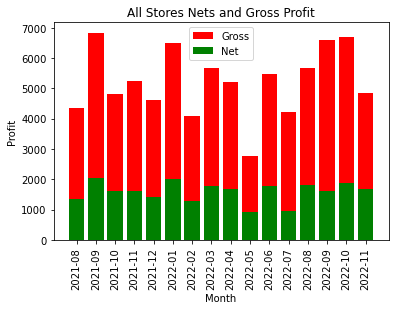

In [2026]:
# x-coordinates of left sides of bars 
left = df5['Date']
  
# heights of bars
Gross = df5['Gross']
Net = df5['Net']
  
# labels for bars
tick_label = df5['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['red'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('All Stores Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.show()

In [ ]:
frames = [df0, df1, df2, df3, df4, df5]

df99 = pd.concat(frames)
# df99.drop(columns=['Date'], inplace=True)
df99.head(30)

# print(df99['Net'].sum())
# print(df99['Gross'].sum())

,Date,Gross,Net
Date,,,
2021-09,2021-09,300.00,100.00
2021-12,2021-12,320.00,120.00
2022-01,2022-01,1125.00,375.00
2022-02,2022-02,450.00,150.00
2022-04,2022-04,825.00,275.00
2022-07,2022-07,240.00,90.00
2021-08,2021-08,300.00,100.00
2021-09,2021-09,75.00,25.00
2022-02,2022-02,600.00,200.00


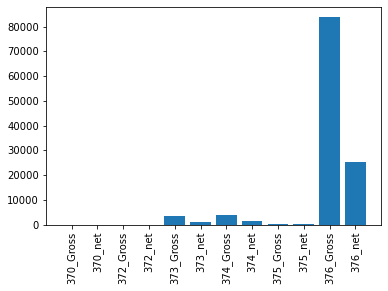

Total Gross: 90975.36
Total Net: 28075.36


In [ ]:
frames = [df0, df1, df2, df3, df4, df5]

df99 = pd.concat(frames)
df99.head()

# print(df99['Net'].sum())
# print(df99['Gross'].sum())


Net_Gross = {
    '370_Gross' : df0['Gross'].sum(),
    '370_net' : df0['Net'].sum(),
    '372_Gross' : df1['Gross'].sum(),
    '372_net' : df1['Net'].sum(),
    '373_Gross' : df2['Gross'].sum(),
    '373_net' : df2['Net'].sum(),
    '374_Gross' : df3['Gross'].sum(),
    '374_net' : df3['Net'].sum(),
    '375_Gross' : df4['Gross'].sum(),
    '375_net' : df4['Net'].sum(),
    '376_Gross' : df5['Gross'].sum(),
    '376_net' : df5['Net'].sum(),
}

data = Net_Gross
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df0['Gross'].sum() + df1['Gross'].sum() + df2['Gross'].sum() + df3['Gross'].sum() + df4['Gross'].sum() + df5['Gross'].sum()
Total_net = df0['Net'].sum() + df1['Net'].sum() + df2['Net'].sum() + df3['Net'].sum() + df4['Net'].sum() + df5['Net'].sum()

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))


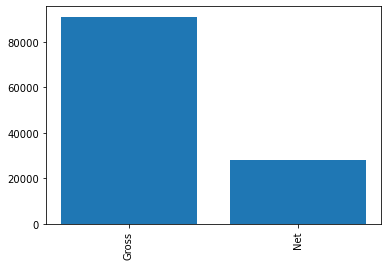

Total Gross: 90975.36
Total Net: 28075.36


In [ ]:
# Graph for total time span imported

Net_Gross_all = {
    'Gross' : df99['Gross'].sum(),
    'Net' : df99['Net'].sum()
}

data = Net_Gross_all
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.xticks(range(len(names)), names, rotation='vertical')
plt.show()

Total_Gross = df99['Gross'].sum()
Total_net = df99['Net'].sum() 

print('Total Gross:',(Total_Gross))
print('Total Net:',(Total_net))

In [ ]:
df99.head()

,Date,Gross,Net
Date,,,
2021-09,2021-09,300.0,100.0
2021-12,2021-12,320.0,120.0
2022-01,2022-01,1125.0,375.0
2022-02,2022-02,450.0,150.0
2022-04,2022-04,825.0,275.0


In [ ]:
df99['Date'] = pd.to_datetime(df99['Date'])
df99['Date'] = df99['Date'].dt.strftime('%Y-%m')

# #define how to aggregate various fields
agg_functions = {'Date': 'first', 'Gross': 'sum', 'Net': 'sum'}

# #create new DataFrame by combining rows with same id values
df99 = df99.groupby(df99['Date']).aggregate(agg_functions)

print(df99)

            Date    Gross      Net
Date                              
2021-08  2021-08  4651.50  1451.50
2021-09  2021-09  7210.00  2160.00
2021-10  2021-10  4828.00  1628.00
2021-11  2021-11  5258.50  1608.50
2021-12  2021-12  4938.00  1538.00
2022-01  2022-01  7640.50  2390.50
2022-02  2022-02  5142.00  1642.00
2022-03  2022-03  6740.00  2340.00
2022-04  2022-04  7185.00  2285.00
2022-05  2022-05  3140.00  1040.00
2022-06  2022-06  5468.50  1768.50
2022-07  2022-07  4451.00  1051.00
2022-08  2022-08  5667.00  1817.00
2022-09  2022-09  6835.00  1685.00
2022-10  2022-10  6682.49  1882.49
2022-11  2022-11  5137.87  1787.87


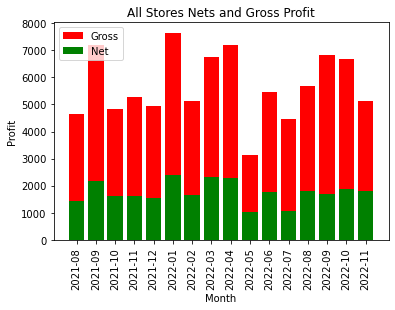

In [ ]:
# x-coordinates of left sides of bars 
left = df99['Date']
  
# heights of bars
Gross = df99['Gross']
Net = df99['Net']
  
# labels for bars
tick_label = df99['Date']
  
# plotting a bar chart
plt.bar(left, Gross, tick_label = tick_label, width = 0.8, color = ['red'], label = 'Gross')
plt.bar(left, Net, tick_label = tick_label, width = 0.8, color = ['green'], label = 'Net' )
plt.xticks(rotation='vertical')
  
# naming the x-axis
plt.xlabel('Month')
# naming the y-axis
plt.ylabel('Profit')
# plot title
plt.title('All Stores Nets and Gross Profit')
plt.legend(loc="best")
# function to show the plot
plt.show()